# Numerical Calculus Review

## Data Creation

Text(0.5, 0, 't(s)')

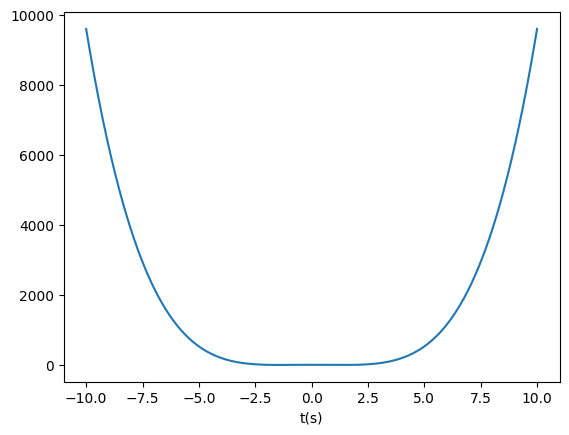

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 4*x**2 + 4

t = np.linspace(-10, 10, 1000)
f_t = f(t)

plt.plot(t,f_t)
plt.xlabel("t(s)")

## Numerical Diferentation

Determine the numerical derivative of the function f, represented as $\left(\frac{df}{dt}\right)$, via finite difference approximation. Subsequently, contrast this result with the numerical evaluation of the symbolic derivative, derived through analytical differentiation, to assess the precision of the numerical approach

In [2]:
def f_hat(x):
    return 4*(x**3) - 8*x

def shift(xs, n):
    if n >= 0:
        return np.concatenate((np.full(n, xs[0]), xs[:-n]))
    else:
        return np.concatenate((xs[-n:], np.full(-n, xs[-1])))

def f_hat_num(x,t):
    delta = shift(t, -1) - t
    salida = (shift(x, -1) - x) / np.mean(delta[:-1])
    return np.concatenate((salida[:-1], [salida[-2]]))

In [3]:
temp = np.array([0,1,2,3,4,5,6])
np.concatenate([temp, [temp[-1]]])

array([0, 1, 2, 3, 4, 5, 6, 6])

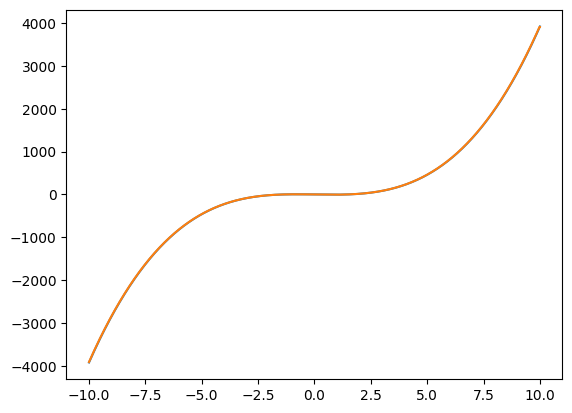

In [4]:
plt.plot(t, f_hat(t))
plt.plot(t, f_hat_num(f(t), t))

## Numerical Integration

Determine the numerical integration of the function f, represented as $\left(\int_{-10}^{10}{f(t)dt}\right)$, via trapezoidal rule. Subsequently, contrast this result with the numerical evaluation of the symbolic integral, derived through analytical differentiation, to assess the precision of the numerical approach

In [5]:
import sympy as sp

# Define the variable and the expression
x1 = sp.symbols("x1")
expr = x1**4 - 4 * x1**2 + 4

result = sp.integrate(expr, (x1, -10, 10)).evalf()

# Print the LaTeX representation
print(sp.latex(expr))
print(result)

x_{1}^{4} - 4 x_{1}^{2} + 4
37413.3333333333


In [6]:
# Define the limits of integration
a = -10
b = 10

# Define the number of subintervals
n = 100

# Calculate the width of each subinterval
h = (b - a) / n

# Initialize the sum
sum = 0.5 * (f(a) + f(b))

# Apply the Trapezoid Rule
for i in range(1, n):
    sum += f(a + i * h)

# Calculate the integral
integral = h * sum

print("Approximate integral:", integral)

Approximate integral: 37439.465599999996


## Numerical solutions of ordinary differential equations (ODEs)

Solve the ODE $\frac{dy}{dx} = 2x - 3y$ with initial condition y(0) = 1 using Euler's Method. With a step 0f 0.1. Suppose that: $x \in \left[0, 10\right]$ and $y \in \left[1, 10\right]$

In [7]:
# Define the derivative function
def f1(x, y):
    return 2 * x - 3 * y


# Initial condition
x0 = 0
y0 = 1

# Step size
h = 0.1

# Total steps
n = int(10 / h)

# Create arrays to store x and y values
x = [0] * (n + 1)
y = [0] * (n + 1)

# Initialize x and y arrays
x[0] = x0
y[0] = y0

# Euler's Method
for i in range(n):
    x[i + 1] = x[i] + h
    y[i + 1] = y[i] + h * f1(x[i], y[i])

## Numerical optimization

Minimize the function f(x) = x^4 - 4x^2 + 4 using Gradient Descent.

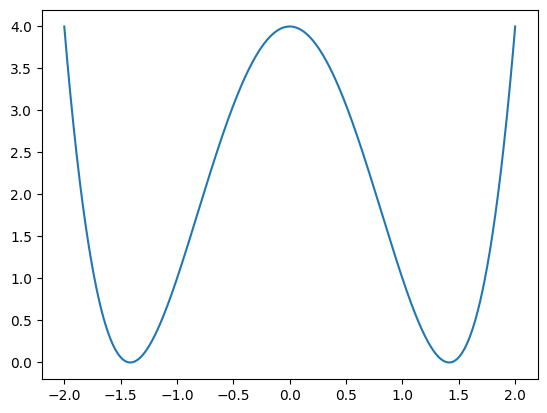

In [8]:
t1= np.linspace(-2,2,1000)
plt.plot(t1, f(t1))

In [37]:
# Initial guess
x0 = 10 * (np.random.rand() - 0.5)

# Learning rate
alpha = 0.01

# Number of iterations
n_iter = 1000

# Gradient Descent
xg = x0
for i in range(n_iter):
    xg = xg - alpha * f_hat(xg)

# Print the minimum
print("Time of the minimum:", xg)
print("Function value at minimum:", f(xg))

Time of the minimum: -1.4142135623730956
Function value at minimum: 8.881784197001252e-16
